# **link คำสั่งเพิ่มเติมเกี่ยวกับ sqlite3**

https://docs.python.org/3/library/sqlite3.html

#**เชื่อมต่อฐานข้อมูล test.db(Connect Database)**

In [ ]:
import sqlite3

conn = sqlite3.connect('test.db')
print("Opened database successfully")
conn.close()

Opened database successfully


In [ ]:
# สร้างตัวแปร เชื่อมต่่อข้อมูล เพื่อสร้างพื้นที่ว่างไว้

# **สร้างตารางฐานข้อมูล (Create Table)**

In [ ]:
conn = sqlite3.connect('test.db')

with conn:
  conn.execute('''CREATE TABLE COMPANY
         (ID INT PRIMARY KEY     NOT NULL,
         NAME           TEXT    NOT NULL,
         AGE            INT     NOT NULL,
         ADDRESS        CHAR(50),
         SALARY         REAL)''')

conn.close()
print("Table created successfully")

Table created successfully


In [ ]:
# เป็นการสร้างตาราง แต่ยังไม่ใส่ข้อมูล
# CHAR(50) = 50 ตัว
# Not Null คือ ตรงนี้ต้องมีค่า

# **แทรกข้อมูลในตาราง (Insert Data)**

In [ ]:
conn = sqlite3.connect('test.db')

with conn:
  conn.execute("INSERT INTO COMPANY (ID,NAME,AGE,ADDRESS,SALARY) \
      VALUES (1, 'Paul', 32, 'California', 20000.00 )");

  conn.execute("INSERT INTO COMPANY (ID,NAME,AGE,ADDRESS,SALARY) \
      VALUES (2, 'Allen', 25, 'Texas', 15000.00 )");
conn.close()
print("Records created successfully")

Records created successfully


In [ ]:
# การใส่หรือแทรกข้อมูล
# เครื่องหมาย \ คือ เขียนต่ออีกบรรทัดหนึ่ง
# conn.close() คือ ปิดให้เรียบร้อย คือ เรา insert เรียบร้อยแล้ว

# **แทรกข้อมูลในตาราง แบบสั้น**

In [ ]:
conn = sqlite3.connect('test.db')

with conn:
  conn.execute("INSERT INTO COMPANY VALUES (3, 'Teddy', 23, 'Norway', 20000.00)")
  conn.execute("INSERT INTO COMPANY VALUES (4, 'Mark', 25, 'Rich-Mond ', 65000.00)")
  conn.execute("INSERT INTO COMPANY VALUES (5, 'David', 27, 'Texas', 85000.00)")
  conn.execute("INSERT INTO COMPANY VALUES (6, 'Kim', 22, 'South-Hall', 45000.00)")
  conn.execute("INSERT INTO COMPANY VALUES (7, 'James', 24, 'Houston', 10000.00)")
  conn.execute("INSERT INTO COMPANY VALUES (8, 'Paul', 24, 'Houston', 20000.00)")
  conn.execute("INSERT INTO COMPANY VALUES (9, 'James', 44, 'Norway', 5000.00)")
  #conn.commit()

conn.close()
print("Records created successfully")

Records created successfully


In [ ]:
# การ commit ยืนยันว่าทุกอย่าง Okay ไม่สามารถ rollback ได้เกินจุดนี้
# ถ้ายังไม่ commit เราจะสามารถ rollback (redo) กลับมาได้อยู่

# **สร้าง Utility สำหรับดูข้อมูล**

In [ ]:
import numpy as np
import pandas as pd

def get_data(cursor):
  all_rows = cursor.fetchall()
  #[all_rows.append(np.array(row)) for row in cursor]
  column_names = [description[0] for description in cursor.description]
  df = pd.DataFrame(data=all_rows, columns = column_names)
  # ซ่อน index
  blankIndex=[''] * len(df)
  df.index=blankIndex
  return df

In [ ]:
  #[all_rows.append(np.array(row)) for row in cursor]
## การอ่านทีละแถว แล้วเก็บแต่ละแถวเข้าไป
## description คือ field ทั้งหมด 5 ตัว
## เอาข้อมูลมาเก็บใน ตัวแปร df
  # ซ่อน index
## (implicit index)

# **คิวรี่ข้อมูลจากตาราง(Select From Table)**

In [ ]:
conn = sqlite3.connect('test.db')

with conn:
  cursor = conn.execute("SELECT * FROM COMPANY")

df=get_data(cursor)
conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,1,Paul,32,California,20000.0
,2,Allen,25,Texas,15000.0
,3,Teddy,23,Norway,20000.0
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,85000.0
,6,Kim,22,South-Hall,45000.0
,7,James,24,Houston,10000.0
,8,Paul,24,Houston,20000.0
,9,James,44,Norway,5000.0


# **แก้ไขตาราง**

**เปลี่ยนชื่อ Table**

In [ ]:
conn = sqlite3.connect('test.db')

with conn:
  cursor = conn.execute("ALTER TABLE COMPANY RENAME TO OLD_COMPANY")

conn.close()
print("Operation done successfully")

Operation done successfully


**เพิ่มคอลัมน์**

In [ ]:
conn = sqlite3.connect('test.db')
# ตอนนี้เราต้องใช้ชื่อเป็น OLD_COMPANY
with conn:
  cursor = conn.execute("ALTER TABLE OLD_COMPANY ADD COLUMN SEX char(1)")

conn.close()
print("Operation done successfully")

Operation done successfully


**คิวรี่หลังการเปลี่ยนแปลง**

In [ ]:
conn = sqlite3.connect('test.db')

with conn:
  cursor = conn.execute("SELECT * FROM OLD_COMPANY")

df=get_data(cursor)
conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY,SEX
,1,Paul,32,California,20000.0,None
,2,Allen,25,Texas,15000.0,None
,3,Teddy,23,Norway,20000.0,None
,4,Mark,25,Rich-Mond,65000.0,None
,5,David,27,Texas,85000.0,None
,6,Kim,22,South-Hall,45000.0,None
,7,James,24,Houston,10000.0,None
,8,Paul,24,Houston,20000.0,None
,9,James,44,Norway,5000.0,None


# **ลบตาราง(Drop Table)**

In [ ]:
conn = sqlite3.connect('test.db')

with conn:
  conn.execute("DROP table IF EXISTS OLD_COMPANY")

conn.close()
print("Table dropped successfully")

Table dropped successfully


**จากข้างต้น Table จะถูกลบแล้ว จะต้องทำการสร้างตารางขึ้นใหม่**
# **AutoIncrement**
ตัวอย่างการสร้าง table โดยให้ primary key เป็น autoincrement

In [ ]:
conn = sqlite3.connect('test.db')
# การให้ระบบมันสร้าง ID ให้เอง
with conn:
  conn.execute('''CREATE TABLE COMPANY
        (ID INTEGER PRIMARY KEY AUTOINCREMENT,
         NAME           TEXT    NOT NULL,
         AGE            INT     NOT NULL,
         ADDRESS        CHAR(50),
         SALARY         REAL)''')

conn.close()
print("Table created successfully")

Table created successfully


**การเพิ่มข้อมูล โดยไม่ระบุ primary key**

In [ ]:
conn = sqlite3.connect('test.db')

with conn:
  conn.execute("INSERT INTO COMPANY (NAME,AGE,ADDRESS,SALARY)\
             VALUES ('Paul', 32, 'California', 20000.00 )")

  conn.execute("INSERT INTO COMPANY (NAME,AGE,ADDRESS,SALARY)\
            VALUES ('Allen', 25, 'Texas', 15000.00 )")

  conn.execute("INSERT INTO COMPANY (NAME,AGE,ADDRESS,SALARY)\
            VALUES ('Teddy', 23, 'Norway', 20000.00 )")

  conn.execute("INSERT INTO COMPANY (NAME,AGE,ADDRESS,SALARY)\
            VALUES ('Mark', 25, 'Rich-Mond ', 65000.00 )")

  conn.execute("INSERT INTO COMPANY (NAME,AGE,ADDRESS,SALARY)\
            VALUES ('David', 27, 'Texas', 85000.00 )")

  conn.execute("INSERT INTO COMPANY (NAME,AGE,ADDRESS,SALARY)\
            VALUES ('Kim', 22, 'South-Hall', 45000.00 )")

  conn.execute("INSERT INTO COMPANY (NAME,AGE,ADDRESS,SALARY)\
            VALUES ('James', 24, 'Houston', 10000.00)")

  conn.execute("INSERT INTO COMPANY (NAME,AGE,ADDRESS,SALARY)\
            VALUES ('Paul', 24, 'Houston', 20000.00)")

  conn.execute("INSERT INTO COMPANY (NAME,AGE,ADDRESS,SALARY)\
            VALUES ('James', 44, 'Norway', 5000.00)")
  #conn.commit()

print("Records created successfully")

Records created successfully


# **SELECT Query (การค้นหาข้อมูล)**

เริ่มจากการใช้ฟังก์ชันเพื่อแสดงข้อมูลจากการคิวรี่

In [ ]:
conn = sqlite3.connect('test.db')

#cursor = conn.execute("SELECT id, name, age, salary from COMPANY")
cursor = conn.execute("SELECT * from COMPANY")
#Select query field of table
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,1,Paul,32,California,20000.0
,2,Allen,25,Texas,15000.0
,3,Teddy,23,Norway,20000.0
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,85000.0
,6,Kim,22,South-Hall,45000.0
,7,James,24,Houston,10000.0
,8,Paul,24,Houston,20000.0
,9,James,44,Norway,5000.0


In [ ]:
# สมมติเราอยากได้ Name กับ Salary
conn = sqlite3.connect('test.db')

#cursor = conn.execute("SELECT id, name, age, salary from COMPANY")
cursor = conn.execute("SELECT name, salary from COMPANY")
#Select query field of table
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,NAME,SALARY
,Paul,20000.0
,Allen,15000.0
,Teddy,20000.0
,Mark,65000.0
,David,85000.0
,Kim,45000.0
,James,10000.0
,Paul,20000.0
,James,5000.0


**Where Clause**

การใช้ operator AND

In [ ]:
# (Select *) คือ เอามาทุก field เลย
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY WHERE AGE >= 25 AND SALARY >= 65000")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,85000.0


In [ ]:
# เอาแต่ name
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT name FROM COMPANY WHERE AGE >= 25 AND SALARY >= 65000")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,NAME
,Mark
,David


การใช้ operator OR

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY WHERE AGE >= 25 OR SALARY >= 65000")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,1,Paul,32,California,20000.0
,2,Allen,25,Texas,15000.0
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,85000.0
,9,James,44,Norway,5000.0


การใช้ IS NULL กับ IS NOT NULL

In [ ]:
# NULL แปลว่า ไม่ได้ใส่หรือไร้ค่า (ไม่ใช่ค่า 0)

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY WHERE SALARY IS NULL")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY


In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY WHERE AGE IS NOT NULL")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,1,Paul,32,California,20000.0
,2,Allen,25,Texas,15000.0
,3,Teddy,23,Norway,20000.0
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,85000.0
,6,Kim,22,South-Hall,45000.0
,7,James,24,Houston,10000.0
,8,Paul,24,Houston,20000.0
,9,James,44,Norway,5000.0


การใช้ LIKE

In [ ]:
# age Like '2%' คือ ข้างหน้าเป็นเลข 2 ข้างหลังเป็นตัวอะไรก็ได้

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY WHERE age LIKE '2%'")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,2,Allen,25,Texas,15000.0
,3,Teddy,23,Norway,20000.0
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,85000.0
,6,Kim,22,South-Hall,45000.0
,7,James,24,Houston,10000.0
,8,Paul,24,Houston,20000.0


In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY WHERE ADDRESS  LIKE '%-%'")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,4,Mark,25,Rich-Mond,65000.0
,6,Kim,22,South-Hall,45000.0


การใช้ GLOB

In [ ]:
# ADDRESS อะไรก็ได้ที่มี ou

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY WHERE ADDRESS GLOB '*ou*'")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,6,Kim,22,South-Hall,45000.0
,7,James,24,Houston,10000.0
,8,Paul,24,Houston,20000.0


การใช้ operator IN กับ NOT IN

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY WHERE AGE IN ( 25, 27 )")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,2,Allen,25,Texas,15000.0
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,85000.0


In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY WHERE AGE NOT IN ( 25, 27 )")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,1,Paul,32,California,20000.0
,3,Teddy,23,Norway,20000.0
,6,Kim,22,South-Hall,45000.0
,7,James,24,Houston,10000.0
,8,Paul,24,Houston,20000.0
,9,James,44,Norway,5000.0


การใช้ operator BETWEEN

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY WHERE AGE BETWEEN 25 AND 27")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,2,Allen,25,Texas,15000.0
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,85000.0


การใช้ประโยค sub-query

In [ ]:
# เป็นการนำ subquery ซ้อนเข้าไปใน query อีกทีหนึ่ง

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY \
   WHERE AGE > (SELECT AGE FROM COMPANY WHERE SALARY > 65000)")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,1,Paul,32,California,20000.0
,9,James,44,Norway,5000.0


# **คำสั่ง DISTINCT**

ก่อนใช้ distinct

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT id, name, age, address, salary from COMPANY")
#Select query field of table
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,3,Teddy,23,Norway,20000.0
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,42500.0
,6,Kim,22,South-Hall,45000.0
,7,James,24,Houston,10000.0
,8,Paul,24,Houston,20000.0


หลังใช้ DISTINCT

In [ ]:
# คือ การหาข้อมูลเฉพาะที่มันต่าง

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT DISTINCT name FROM COMPANY")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,NAME
,Teddy
,Mark
,David
,Kim
,James
,Paul


# **การใช้ LIMIT**

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY LIMIT 6")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,1,Paul,32,California,20000.0
,2,Allen,25,Texas,15000.0
,3,Teddy,23,Norway,20000.0
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,85000.0
,6,Kim,22,South-Hall,45000.0


# **การใช้ OFFSET ร่วมกับ LIMIT**

In [ ]:
# OFFSET 2 คือ เริ่มที่ 2 แล้วก็ตัวถัดมา

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY LIMIT 3 OFFSET 2")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,3,Teddy,23,Norway,20000.0
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,85000.0


# **UPDATE QUERY**

In [ ]:
# record ของ SALARY เดิมเป็น 20000.00
# แต่ต้องอย่าลืม อ้าง ID เพราะตอนนี้ Primary Key เป็น Autoincrement

In [ ]:
conn = sqlite3.connect('test.db')

with conn:
  conn.execute("UPDATE COMPANY set SALARY = 25000.00 where ID = 1")
  print("Total number of rows updated :", conn.total_changes)

conn.close()
print("Operation done successfully");

Total number of rows updated : 1
Operation done successfully


In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT id, name, address, salary from COMPANY")
#Select query field of table
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,ADDRESS,SALARY
,1,Paul,California,25000.0
,2,Allen,Texas,15000.0
,3,Teddy,Norway,20000.0
,4,Mark,Rich-Mond,65000.0
,5,David,Texas,85000.0
,6,Kim,South-Hall,45000.0
,7,James,Houston,10000.0
,8,Paul,Houston,20000.0
,9,James,Norway,5000.0


# **Delete Query**

In [ ]:
conn = sqlite3.connect('test.db')

with conn:
  conn.execute("DELETE from COMPANY where ID = 2")
  #ลบ record ที่มี id = 2
  print("Total number of rows deleted :", conn.total_changes)

cursor = conn.execute("SELECT id, name, address, salary from COMPANY")
df = get_data(cursor)

conn.close()
print("Operation done successfully");
df

Total number of rows deleted : 1
Operation done successfully


,ID,NAME,ADDRESS,SALARY
,1,Paul,California,25000.0
,3,Teddy,Norway,20000.0
,4,Mark,Rich-Mond,65000.0
,5,David,Texas,85000.0
,6,Kim,South-Hall,45000.0
,7,James,Houston,10000.0
,8,Paul,Houston,20000.0
,9,James,Norway,5000.0


# **Commit กับ Rollback**

**ตัวอย่าง commit()**

In [ ]:
# เพื่อสร้างจุดสุดท้ายของการ rollback
# ควร commit เมื่อทุกอย่าง okay แล้ว ไม่งั้นย้อนกลับการกระทำมไม่ได้ T_T

In [ ]:
# ดู df
conn = sqlite3.connect('test.db')
cursor = conn.execute("SELECT id, name, age, address, salary from COMPANY")
df = get_data(cursor)

conn.close()
print("Operation done successfully");
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,1,Paul,32,California,25000.0
,3,Teddy,23,Norway,20000.0
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,85000.0
,6,Kim,22,South-Hall,45000.0
,7,James,24,Houston,10000.0
,8,Paul,24,Houston,20000.0
,9,James,44,Norway,5000.0


In [ ]:
# ให้ใส่หรือไม่ใส่ #conn.commit()
conn = sqlite3.connect('test.db')

conn.execute("INSERT INTO COMPANY (NAME,AGE,ADDRESS,SALARY)\
            VALUES ('Mana', 15, 'Thailand', 45000.00)")
#conn.commit()

cursor = conn.execute("SELECT id, name, age, address, salary from COMPANY")
df = get_data(cursor)

conn.close()
print("Operation done successfully");
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,1,Paul,32,California,25000.0
,3,Teddy,23,Norway,20000.0
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,85000.0
,6,Kim,22,South-Hall,45000.0
,7,James,24,Houston,10000.0
,8,Paul,24,Houston,20000.0
,9,James,44,Norway,5000.0
,10,Mana,15,Thailand,45000.0


**ตัวอย่าง rollback()**

In [ ]:
# id ไม่ต้องสนใจเมื่อเป็น autoincrement

In [ ]:
# ให้ใส่หรือไม่ใส่ #conn.rollback()
conn = sqlite3.connect('test.db')

#conn.execute("INSERT INTO COMPANY (NAME,AGE,ADDRESS,SALARY)\
            #VALUES ('Mana', 15, 'Thailand', 15000.00)")
#conn.execute("INSERT INTO COMPANY (NAME,AGE,ADDRESS,SALARY)\
            #VALUES ('Tommy', 45, 'Japan', 15000.00)")
#conn.execute("INSERT INTO COMPANY (NAME,AGE,ADDRESS,SALARY)\
            #VALUES ('Susan', 42, 'England', 15000.00)")
conn.rollback()

cursor = conn.execute("SELECT id, name, age, address, salary from COMPANY")
df = get_data(cursor)

conn.close()
print("Operation done successfully");
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,1,Paul,32,California,25000.0
,3,Teddy,23,Norway,20000.0
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,85000.0
,6,Kim,22,South-Hall,45000.0
,7,James,24,Houston,10000.0
,8,Paul,24,Houston,20000.0
,9,James,44,Norway,5000.0


# **เมื่อใช้ประโยค with**
* เมธอด commit()จะถูกเรียกอัตโนมัติหลังจากบล็อกทำงานเสร็จ
*เมธอด rollback() จะถูกเรียกอัตโนมัติเมื่อเกิด exception



In [ ]:
# commit() ตลอดเวลา

In [ ]:
conn = sqlite3.connect('test.db')

# Successful, con.commit() is called automatically afterwards
with conn:
    conn.execute("DELETE FROM COMPANY WHERE AGE = 35")
    print("Total number of rows deleted :", conn.total_changes)

# con.rollback() is called after the with block finishes with an exception, the
# exception is still raised and must be caught
try:
    with conn:
        conn.execute("DELETE FROM COMPANY WHERE AGE = 35")
except sqlite3.IntegrityError:
    print ("couldn't delete twice")

conn.close()

Total number of rows deleted : 0


In [ ]:
conn = sqlite3.connect('test.db')
cursor = conn.execute("SELECT id, name, age, address, salary from COMPANY")
df = get_data(cursor)

conn.close()
print("Operation done successfully");
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,1,Paul,32,California,25000.0
,3,Teddy,23,Norway,20000.0
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,85000.0
,6,Kim,22,South-Hall,45000.0
,7,James,24,Houston,10000.0
,8,Paul,24,Houston,20000.0
,9,James,44,Norway,5000.0


# **ประโยค ORDER BY**
ใช้ ASC : Ascending น้อยไปมาก

In [ ]:
# เรียง SALARY จากน้อยไปมาก

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY ORDER BY SALARY ASC")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,9,James,44,Norway,5000.0
,7,James,24,Houston,10000.0
,3,Teddy,23,Norway,20000.0
,8,Paul,24,Houston,20000.0
,1,Paul,32,California,25000.0
,6,Kim,22,South-Hall,45000.0
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,85000.0


In [ ]:
# ASC คือ เรียงชื่อจาก A-Z

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY ORDER BY NAME, SALARY ASC")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,5,David,27,Texas,85000.0
,9,James,44,Norway,5000.0
,7,James,24,Houston,10000.0
,6,Kim,22,South-Hall,45000.0
,4,Mark,25,Rich-Mond,65000.0
,8,Paul,24,Houston,20000.0
,1,Paul,32,California,25000.0
,3,Teddy,23,Norway,20000.0


ใช้ DESC : Descanding มากไปน้อย

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY ORDER BY NAME DESC")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,3,Teddy,23,Norway,20000.0
,1,Paul,32,California,25000.0
,8,Paul,24,Houston,20000.0
,4,Mark,25,Rich-Mond,65000.0
,6,Kim,22,South-Hall,45000.0
,7,James,24,Houston,10000.0
,9,James,44,Norway,5000.0
,5,David,27,Texas,85000.0


# **Group by**

In [ ]:
# คนไหนชื่อซ้ำ เอา SALARY มา SUM กัน

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT NAME, SUM(SALARY) FROM COMPANY GROUP BY NAME")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,NAME,SUM(SALARY)
,David,85000.0
,James,15000.0
,Kim,45000.0
,Mark,65000.0
,Paul,45000.0
,Teddy,20000.0


**group by ร่วมกับ order by**

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT NAME, SUM(SALARY) FROM COMPANY GROUP BY NAME ORDER BY NAME")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,NAME,SUM(SALARY)
,David,85000.0
,James,15000.0
,Kim,45000.0
,Mark,65000.0
,Paul,45000.0
,Teddy,20000.0


# **การใช้ having กับ count**

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY GROUP BY name HAVING count(name) < 2")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,5,David,27,Texas,85000.0
,6,Kim,22,South-Hall,45000.0
,4,Mark,25,Rich-Mond,65000.0
,3,Teddy,23,Norway,20000.0


In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY GROUP BY name HAVING count(name) >= 2")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,7,James,24,Houston,10000.0
,1,Paul,32,California,25000.0


# **JOIN**

ใช้กับ 2 ตารางขึ้นไป

สร้าง Table ใหม่ ชื่่อ department

In [ ]:
conn = sqlite3.connect('test.db')

with conn:
  conn.execute('''CREATE TABLE DEPARTMENT(
   ID INT PRIMARY KEY      NOT NULL,
   DEPT           CHAR(50) NOT NULL,
   EMP_ID         INT      NOT NULL
  );''')

conn.close()
print("Table created successfully")

Table created successfully


In [ ]:
conn = sqlite3.connect('test.db')

with conn:
  conn.execute("INSERT INTO DEPARTMENT (ID, DEPT, EMP_ID) \
  VALUES (1, 'IT Billing', 1 )")

  conn.execute("INSERT INTO DEPARTMENT (ID, DEPT, EMP_ID) \
  VALUES (2, 'Engineering', 2 )")

  conn.execute("INSERT INTO DEPARTMENT (ID, DEPT, EMP_ID) \
  VALUES (3, 'Finance', 7 )")

conn.close()
print("Records created successfully")

Records created successfully


In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT id, DEPT, EMP_ID from DEPARTMENT")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,DEPT,EMP_ID
,1,IT Billing,1
,2,Engineering,2
,3,Finance,7


In [ ]:
# EMP_ID คือ Employee ID

# **Cross Join**

In [ ]:
# Cross Join มีหลักการคล้ายกับผลคูณ Cartesian
# เช่น Table 1 (3 แถว) Cross Join Table 2 (2 แถว)จะได้ Table ที่มีแถวเป็น 6 แถว

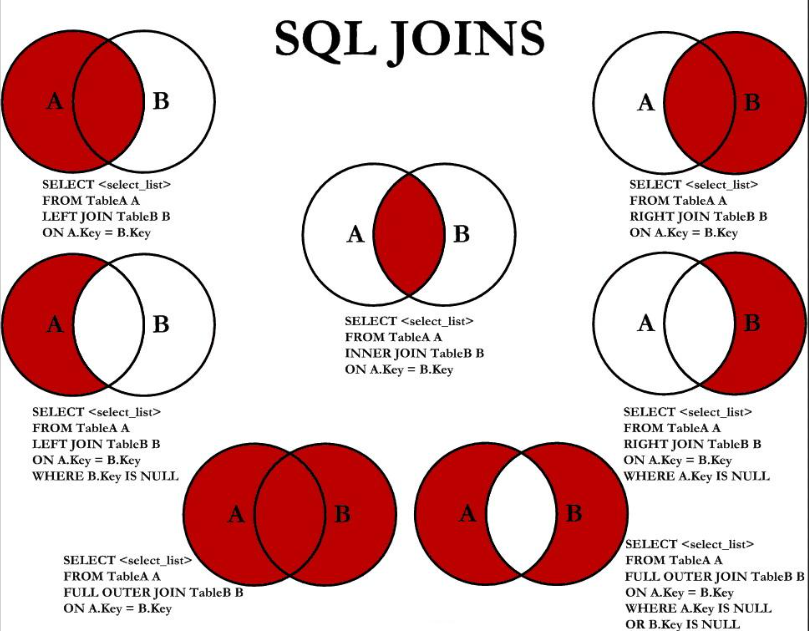

In [ ]:
# LEFT JOIN คือ เอาทั้งหมดที่ A
# RIGHT JOIN คือ เอาทั้งหมดที่ B
# รูปสองอันล่างขวาไม่ต้องสนใจมาก

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT EMP_ID, NAME, DEPT FROM COMPANY CROSS JOIN DEPARTMENT")
df = get_data(cursor)

print("Operation done successfully")
conn.close()
df

Operation done successfully


,EMP_ID,NAME,DEPT
,1,Paul,IT Billing
,2,Paul,Engineering
,7,Paul,Finance
,1,Teddy,IT Billing
,2,Teddy,Engineering
,7,Teddy,Finance
,1,Mark,IT Billing
,2,Mark,Engineering
,7,Mark,Finance
,1,David,IT Billing


# **Inner Join**

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT EMP_ID, NAME, DEPT FROM COMPANY INNER JOIN DEPARTMENT \
   ON COMPANY.ID = DEPARTMENT.EMP_ID")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,EMP_ID,NAME,DEPT
,1,Paul,IT Billing
,7,James,Finance


# **Outer Join**

In [ ]:
# NaN คือ Not a Number

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT EMP_ID, NAME, DEPT FROM COMPANY LEFT OUTER JOIN DEPARTMENT \
   ON COMPANY.ID = DEPARTMENT.EMP_ID")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,EMP_ID,NAME,DEPT
,1.0,Paul,IT Billing
,NaN,Teddy,None
,NaN,Mark,None
,NaN,David,None
,NaN,Kim,None
,7.0,James,Finance
,NaN,Paul,None
,NaN,James,None


# **UNION**

ข้อมูลจาก table **company**

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("select * from COMPANY")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,1,Paul,32,California,25000.0
,3,Teddy,23,Norway,20000.0
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,85000.0
,6,Kim,22,South-Hall,45000.0
,7,James,24,Houston,10000.0
,8,Paul,24,Houston,20000.0
,9,James,44,Norway,5000.0


ข้อมูลจาก table **department**

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("select * from DEPARTMENT")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,DEPT,EMP_ID
,1,IT Billing,1
,2,Engineering,2
,3,Finance,7


# **ใช้ UNION**

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute('''SELECT EMP_ID, NAME, DEPT FROM COMPANY INNER JOIN DEPARTMENT
         ON COMPANY.ID = DEPARTMENT.EMP_ID

         UNION

         SELECT EMP_ID, NAME, DEPT FROM COMPANY LEFT OUTER JOIN DEPARTMENT
         ON COMPANY.ID = DEPARTMENT.EMP_ID''')

df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,EMP_ID,NAME,DEPT
,NaN,David,None
,NaN,James,None
,NaN,Kim,None
,NaN,Mark,None
,NaN,Paul,None
,NaN,Teddy,None
,1.0,Paul,IT Billing
,7.0,James,Finance


# **ใช้ UNION ALL**

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute('''SELECT EMP_ID, NAME, DEPT FROM COMPANY INNER JOIN DEPARTMENT
         ON COMPANY.ID = DEPARTMENT.EMP_ID

         UNION ALL

         SELECT EMP_ID, NAME, DEPT FROM COMPANY LEFT OUTER JOIN DEPARTMENT
         ON COMPANY.ID = DEPARTMENT.EMP_ID;''')

df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,EMP_ID,NAME,DEPT
,1.0,Paul,IT Billing
,7.0,James,Finance
,1.0,Paul,IT Billing
,NaN,Teddy,None
,NaN,Mark,None
,NaN,David,None
,NaN,Kim,None
,7.0,James,Finance
,NaN,Paul,None
,NaN,James,None


# ใช้ ALIAS ตั้งชื่ออ้างอิง Table หรือคอลัมน์ใหม่

**อ้างอิง table**

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute('''SELECT C.ID, C.NAME, C.AGE, D.DEPT
                FROM COMPANY AS C, DEPARTMENT AS D
                WHERE  C.ID = D.EMP_ID''')
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,DEPT
,1,Paul,32,IT Billing
,7,James,24,Finance


**อ้างอิงคอลัมน์**

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute('''SELECT C.ID AS COMPANY_ID, C.NAME AS COMPANY_NAME, C.AGE, D.DEPT
                          FROM COMPANY AS C, DEPARTMENT AS D
                          WHERE  C.ID = D.EMP_ID''')
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,COMPANY_ID,COMPANY_NAME,AGE,DEPT
,1,Paul,32,IT Billing
,7,James,24,Finance


# **การจัดดำเนินการกับคิวรี่ย่อย**

## **SELECT**

In [ ]:
# คัดกรองตัว data ด้วยเงื่อนไข

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute('''SELECT *
   FROM COMPANY
   WHERE ID IN (SELECT ID
      FROM COMPANY
      WHERE SALARY > 45000)''')
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,85000.0


## **INSERT**

สร้าง table ชื่อ COMPANY_BKP

In [ ]:
# นี่คือ วิธีการ copy table

In [ ]:
conn = sqlite3.connect('test.db')

with conn:
  conn.execute('''CREATE TABLE COMPANY_BKP
         (ID INT PRIMARY KEY     NOT NULL,
         NAME           TEXT    NOT NULL,
         AGE            INT     NOT NULL,
         ADDRESS        CHAR(50),
         SALARY         REAL)''')

conn.close()
print("Table created successfully")

Table created successfully


In [ ]:
conn = sqlite3.connect('test.db')

with conn:
  cursor = conn.execute('''INSERT INTO COMPANY_BKP
   SELECT * FROM COMPANY
   WHERE ID IN (SELECT ID
      FROM COMPANY)''')

conn.close()
print("Records created successfully")

Records created successfully


In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY_BKP")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,1,Paul,32,California,25000.0
,3,Teddy,23,Norway,20000.0
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,85000.0
,6,Kim,22,South-Hall,45000.0
,7,James,24,Houston,10000.0
,8,Paul,24,Houston,20000.0
,9,James,44,Norway,5000.0


## **UPDATE**

In [ ]:
conn = sqlite3.connect('test.db')

with conn:
  cursor = conn.execute('''UPDATE COMPANY
   SET SALARY = SALARY * 0.50
   WHERE AGE IN (SELECT AGE FROM COMPANY_BKP
      WHERE AGE >= 27 )''')

conn.close()
print("Records created successfully")

Records created successfully


In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY_BKP")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,1,Paul,32,California,25000.0
,3,Teddy,23,Norway,20000.0
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,85000.0
,6,Kim,22,South-Hall,45000.0
,7,James,24,Houston,10000.0
,8,Paul,24,Houston,20000.0
,9,James,44,Norway,5000.0


In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,1,Paul,32,California,12500.0
,3,Teddy,23,Norway,20000.0
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,42500.0
,6,Kim,22,South-Hall,45000.0
,7,James,24,Houston,10000.0
,8,Paul,24,Houston,20000.0
,9,James,44,Norway,2500.0


In [ ]:
# สังเกต COMPANY มี Salary ลด แต่ COMPANY_BACKUP ยังคงเดิม

## **DELETE**

In [ ]:
conn = sqlite3.connect('test.db')

with conn:
  cursor = conn.execute('''DELETE FROM COMPANY
   WHERE AGE IN (SELECT AGE FROM COMPANY_BKP
   WHERE AGE > 27 )''')

cursor = conn.execute("SELECT * FROM COMPANY")
df = get_data(cursor)
conn.close()
print("Records created successfully")
df

Records created successfully


,ID,NAME,AGE,ADDRESS,SALARY
,3,Teddy,23,Norway,20000.0
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,42500.0
,6,Kim,22,South-Hall,45000.0
,7,James,24,Houston,10000.0
,8,Paul,24,Houston,20000.0


In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,3,Teddy,23,Norway,20000.0
,4,Mark,25,Rich-Mond,65000.0
,5,David,27,Texas,42500.0
,6,Kim,22,South-Hall,45000.0
,7,James,24,Houston,10000.0
,8,Paul,24,Houston,20000.0


# **การสร้าง INDEX**

In [ ]:
# เพื่อเข้าถึง data ที่มันถูกสร้างด้วย Primary Key

In [ ]:
conn = sqlite3.connect('test.db')

with conn:
  cursor = conn.execute("CREATE INDEX salary_index ON COMPANY (salary)")

conn.close()
print("Operation done successfully")

Operation done successfully


In [ ]:
# สร้างและใช้ salary_index มาชี้ใน Table COMPANY

**Seach by index**

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM sqlite_master WHERE type = 'index'")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,type,name,tbl_name,rootpage,sql
,index,sqlite_autoindex_DEPARTMENT_1,DEPARTMENT,5,None
,index,sqlite_autoindex_COMPANY_BKP_1,COMPANY_BKP,7,None
,index,salary_index,COMPANY,8,CREATE INDEX salary_index ON COMPANY (salary)


**Select ร่วมกับ index**

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY INDEXED BY salary_index \
                       WHERE salary > 5000")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE,ADDRESS,SALARY
,7,James,24,Houston,10000.0
,3,Teddy,23,Norway,20000.0
,8,Paul,24,Houston,20000.0
,5,David,27,Texas,42500.0
,6,Kim,22,South-Hall,45000.0
,4,Mark,25,Rich-Mond,65000.0


**ลบ index**

In [ ]:
conn = sqlite3.connect('test.db')

with conn:
  cursor = conn.execute("DROP INDEX salary_index")

conn.close()
print("Operation done successfully")

Operation done successfully


# **Views**

In [ ]:
# เวลาเรียกดู จะได้ไม่ต้องลากมาทุก field (เพื่อประหยัดพื้นที่)

## การสร้าง View

In [ ]:
conn = sqlite3.connect('test.db')

with conn:
  conn.execute('''CREATE VIEW COMPANY_VIEW AS
                SELECT ID, NAME, AGE
                FROM  COMPANY;''')

conn.close()
print("View created successfully")

View created successfully


# การแสดง View

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT * FROM COMPANY_VIEW")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,ID,NAME,AGE
,3,Teddy,23
,4,Mark,25
,5,David,27
,6,Kim,22
,7,James,24
,8,Paul,24


# การลบ View

In [ ]:
conn = sqlite3.connect('test.db')

with conn:
  cursor = conn.execute("DROP VIEW COMPANY_VIEW")

conn.close()
print("Operation done successfully")

Operation done successfully


# **ฟังก์ชัน (รองรับ SQLite)**

ฟังก์ชัน count นับจำนวนแถวของ Table

In [ ]:
# ไม่ต้องรู้ Primary Key แต่จะสร้างตัวแปรชื่อว่า count ขึ้นมา

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT count(*) FROM COMPANY")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,count(*)
,6


ฟังก์ชัน max ให้ค่ามากสุดของคอลัมน์นั้น

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT max(salary) FROM COMPANY")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,max(salary)
,65000.0


ฟังก์ชัน min ให้ค่าต่ำสุดของคอลัมน์นั้น

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT min(salary) FROM COMPANY")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,min(salary)
,10000.0


ฟังก์ชัน avg ให้ค่าเฉลี่ยของคอลัมน์นั้น

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT avg(salary) FROM COMPANY")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,avg(salary)
,33750.0


ฟังก์ชัน sum ให้ค่าผลรวมของคอลัมน์นั้น

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT sum(salary) FROM COMPANY")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,sum(salary)
,202500.0


ฟังก์ชัน random จะให้ค่าจำนวเต็มระหว่าง -9223372036854775808 กับ +9223372036854775807

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT random() AS Random")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,Random
,8500528061155286063


ฟังก์ชัน abs, upper, lower, length

In [ ]:
# upper, lower ต้องใช้กับข้อมูล text เท่านั้น

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT abs(5), abs(-15), abs(NULL), abs(0), abs('ABC')")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,abs(5),abs(-15),abs(NULL),abs(0),abs('ABC')
,5,15,None,0,0.0


In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT upper(name) FROM COMPANY")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,upper(name)
,TEDDY
,MARK
,DAVID
,KIM
,JAMES
,PAUL


In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT lower(name) FROM COMPANY")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,lower(name)
,teddy
,mark
,david
,kim
,james
,paul


In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT name, length(name) FROM COMPANY")
df = get_data(cursor)

conn.close()
print("Operation done successfully")
df

Operation done successfully


,NAME,length(name)
,Teddy,5
,Mark,4
,David,5
,Kim,3
,James,5
,Paul,4
